In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [2]:
 #Referencing Lesson 10 Activity 10 - this connects to the db
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)

#Establishing a connection we need to terminate when done
conn = engine.connect()

In [3]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables



['measurement', 'station']

In [4]:
#Referencing Lesson 10.02.07
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
        
    #put in as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


# Step 1

#design a query to retrieve the last 12 months of precipitation data and plot the results.
#Perform a query to retrieve the data and precipitation scores.
#Save the query results as Pandas DataFrame and set eh index to the date column.
#Sort the dataframe by date.
#Use Pandas plotting with matpotlib to plot the data.
#use Pandas to calculate the summary statistics for the precipitation data.

In [5]:
query = """
        Select
            *
        FROM
            measurement
        LIMIT 50;
    """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [6]:
query = """
        Select
            *
        FROM
            station
        LIMIT 25;
    """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
query = """
      SELECT
          cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
      FROM
          measurement      
     """
engine.execute(query).fetchall()

[('2016-08-23',)]

In [13]:
#find the most recent date in the data set - Per Alexander's suggestion

query = """
        SELECT
            *
        FROM
            measurement
        WHERE 
            date >= (
                   SELECT
                      cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                  FROM
                      measurement   
                    );
        """
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2230 non-null   int64  
 1   station  2230 non-null   object 
 2   date     2230 non-null   object 
 3   prcp     2021 non-null   float64
 4   tobs     2230 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 87.2+ KB


In [16]:
#Date is a string, need to convert
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2230 non-null   int64         
 1   station  2230 non-null   object        
 2   date     2230 non-null   datetime64[ns]
 3   prcp     2021 non-null   float64       
 4   tobs     2230 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 87.2+ KB


In [62]:
#Alexander's walk through using the average rain fall
query = """
        SELECT
            date,
            avg(prcp) as prcp
        FROM
            measurement
        WHERE 
            date >= (
                   SELECT
                      cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                  FROM
                      measurement   
                    )
        GROUP BY 
            date
        ORDER BY
            date;
        """
df = pd.read_sql(query, conn)
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


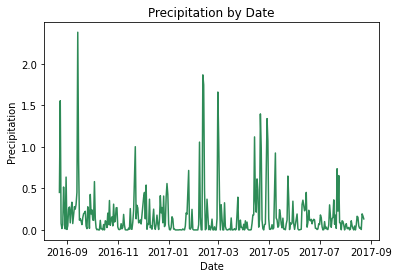

In [63]:
plt.plot(df["date"], df["prcp"], color = 'seagreen')

plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation by Date')
plt.show()

In [48]:
query = """
        Select
            *
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
        LIMIT 10;
        """
engine.execute(query).fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0)]

In [58]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB


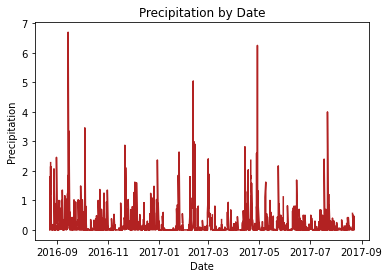

In [59]:
plt.plot(df["date"], df["prcp"], color = 'firebrick')

plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation by Date')
plt.show()

# Step 2

In [ ]:
#Design a query to calculate the total number of stations in the dataset
#Design a query to find the most active stations (i.e. which stations have the most rows?)
##List the stations and observation coutns in descending order
##Which stationID has the highest number of observations?
##Using the most active stationID, calculate the lowest, highest, and average temperature.
#Design a query to retrieve the last 12 months of temperature observation data (TOBS)
##Filter by station with the highest number of observations
##Query the last 12 months of temperature observation data for this station
##Plot results as a histogram with bins=12
